In [45]:
import os

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [43]:
_image_dir = '../datasets/celeba/img_align_celeba_png/'
_img_width = 178
_img_height = 218
_batch_size = 128
_num_epochs = 10

In [3]:
img_df = pd.read_csv('../datasets/celeba/attributes/attr_celeba.csv').replace({-1:0})[['filename', 'Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young']]

In [4]:
img_df.head()

,filename,Eyeglasses,Smiling,Wearing_Lipstick,No_Beard,Young
0,000001.png,0,1,1,1,1
1,000002.png,0,1,0,1,1
2,000003.png,0,0,0,1,1
3,000004.png,0,0,1,1,1
4,000005.png,0,0,1,1,1


In [5]:
partition_df = pd.read_csv('../datasets/celeba/attributes/list_eval_partition.csv')

In [6]:
partition_df.head()

,filename,partition
0,000001.png,0
1,000002.png,0
2,000003.png,0
3,000004.png,0
4,000005.png,0


In [7]:
partition_df['partition'].value_counts().sort_index()

0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [8]:
img_df = img_df.merge(partition_df, on='filename')
img_df.loc[:, 'filename'] = img_df.loc[:, 'filename'].apply(lambda x: os.path.join(_image_dir, x))
img_df.head()

,filename,Eyeglasses,Smiling,Wearing_Lipstick,No_Beard,Young,partition
0,../datasets/celeba/img_align_celeba_png/000001...,0,1,1,1,1,0
1,../datasets/celeba/img_align_celeba_png/000002...,0,1,0,1,1,0
2,../datasets/celeba/img_align_celeba_png/000003...,0,0,0,1,1,0
3,../datasets/celeba/img_align_celeba_png/000004...,0,0,1,1,1,0
4,../datasets/celeba/img_align_celeba_png/000005...,0,0,1,1,1,0


In [9]:
train_df = img_df.loc[img_df.loc[:, 'partition'] == 0, ['filename', 'Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young']]
valid_df = img_df.loc[img_df.loc[:, 'partition'] == 1, ['filename', 'Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young']]
test_df = img_df.loc[img_df.loc[:, 'partition'] == 2, ['filename', 'Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young']]

In [10]:
train_df.head()

,filename,Eyeglasses,Smiling,Wearing_Lipstick,No_Beard,Young
0,../datasets/celeba/img_align_celeba_png/000001...,0,1,1,1,1
1,../datasets/celeba/img_align_celeba_png/000002...,0,1,0,1,1
2,../datasets/celeba/img_align_celeba_png/000003...,0,0,0,1,1
3,../datasets/celeba/img_align_celeba_png/000004...,0,0,1,1,1
4,../datasets/celeba/img_align_celeba_png/000005...,0,0,1,1,1


In [11]:
valid_df.head()

,filename,Eyeglasses,Smiling,Wearing_Lipstick,No_Beard,Young
162770,../datasets/celeba/img_align_celeba_png/162771...,0,1,1,1,1
162771,../datasets/celeba/img_align_celeba_png/162772...,0,1,0,0,0
162772,../datasets/celeba/img_align_celeba_png/162773...,0,0,1,1,1
162773,../datasets/celeba/img_align_celeba_png/162774...,0,1,0,0,1
162774,../datasets/celeba/img_align_celeba_png/162775...,0,0,1,1,1


In [12]:
test_df.head()

,filename,Eyeglasses,Smiling,Wearing_Lipstick,No_Beard,Young
182637,../datasets/celeba/img_align_celeba_png/182638...,0,1,0,1,0
182638,../datasets/celeba/img_align_celeba_png/182639...,0,0,1,1,1
182639,../datasets/celeba/img_align_celeba_png/182640...,0,1,1,1,1
182640,../datasets/celeba/img_align_celeba_png/182641...,0,1,1,1,1
182641,../datasets/celeba/img_align_celeba_png/182642...,0,1,0,1,1


In [13]:
datagen =  ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
)

In [14]:
def display_img(img):
    plt.figure(figsize=(20,10))
    plt.suptitle('Data Augmentation', fontsize=28)
    
    i = 0
    for batch in datagen.flow_from_dataframe(img, batch_size=1, x_col='filename', y_col=['Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young'], class_mode="raw"):
        batch_image = batch[0]
        batch_label = batch[1]
        plt.subplot(3, 5, i+1)
        plt.grid(False)
        plt.imshow(batch_image.reshape(256,256, 3))
        
        if i == 9:
            break
            
        i += 1
            
    print(f'Label: {batch_label}')
    plt.show()

Found 1 validated image filenames.
Label: [[0 1 1 1 1]]


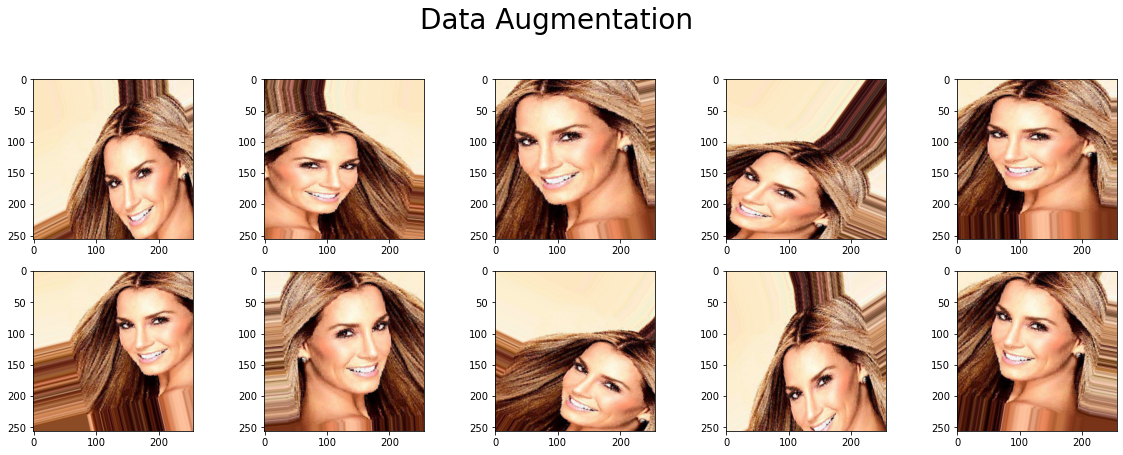

In [15]:
display_img(img_df.loc[:0, :])

In [25]:
train_datagen =  ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #brightness_range=[0.4,1.5],
    rescale=1./255,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    batch_size=20,
    x_col='filename', 
    y_col=['Eyeglasses', 'Smiling'],
    class_mode='raw',
    target_size=(128, 128),
    validate_filenames=False)

Found 162770 non-validated image filenames.


In [26]:
valid_datagen =  ImageDataGenerator(
    rescale=1./255
)

valid_generator = valid_datagen.flow_from_dataframe(
    valid_df,
    batch_size=20,
    x_col='filename', 
    y_col=['Eyeglasses', 'Smiling'],
    class_mode='raw',
    target_size=(128, 128),
    validate_filenames=False)

Found 19867 non-validated image filenames.


In [27]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
checkpointer = ModelCheckpoint(filepath='weights.Eyeglasses_Smiling.h5', verbose=1, save_best_only=True)

In [32]:
hist = model.fit(train_generator,
                  validation_data=valid_generator,
                  steps_per_epoch=len(train_df)//_batch_size,
                  validation_steps=len(valid_df) // _batch_size,
                  epochs=_num_epochs,
                  callbacks=[checkpointer],
                  verbose=1)

Epoch 1/10
1271/1271 [==============================] - 126s 99ms/step - loss: 0.4686 - accuracy: 0.7280 - val_loss: 0.4539 - val_accuracy: 0.7266

Epoch 00001: val_loss improved from inf to 0.45395, saving model to weights.Eyeglasses_Smiling.h5
Epoch 2/10
1271/1271 [==============================] - 121s 95ms/step - loss: 0.4533 - accuracy: 0.7422 - val_loss: 0.4711 - val_accuracy: 0.7631

Epoch 00002: val_loss did not improve from 0.45395
Epoch 3/10
1271/1271 [==============================] - 121s 95ms/step - loss: 0.4442 - accuracy: 0.7467 - val_loss: 0.3673 - val_accuracy: 0.7398

Epoch 00003: val_loss improved from 0.45395 to 0.36728, saving model to weights.Eyeglasses_Smiling.h5
Epoch 4/10
1271/1271 [==============================] - 126s 99ms/step - loss: 0.4398 - accuracy: 0.7531 - val_loss: 0.4273 - val_accuracy: 0.7755

Epoch 00004: val_loss did not improve from 0.36728
Epoch 5/10
1271/1271 [==============================] - 131s 103ms/step - loss: 0.4303 - accuracy: 0.7614 

In [63]:
test_datagen =  ImageDataGenerator(
    rescale=1./255,
)

In [68]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    batch_size=1,
    x_col='filename', 
    y_col=['Eyeglasses', 'Smiling'],
    class_mode='raw',
    target_size=(128, 128),
    validate_filenames=False,
    shuffle=False)

Found 19962 non-validated image filenames.


In [69]:
model_predictions = model.predict(test_generator)

In [70]:
preds = np.array(model_predictions > 0.5).astype(int)

In [95]:
test_accuracy = 100 * accuracy_score(preds, test_df.loc[:, ['Eyeglasses', 'Smiling']].values)
test_accuracy

83.98958020238453

In [96]:
f1_eyeglasses = f1_score(test_df.loc[:,  ['Eyeglasses']].values, preds[:, 0])
f1_smiling = f1_score(test_df.loc[:,  ['Smiling']].values, preds[:, 1])
print(f1_eyeglasses, f1_smiling)

0.7201565557729942 0.860026642073983
